In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [ ]:
#Read the file
Default_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis Data/Anonymize_Loan_Default_data.csv', encoding='latin1')

In [ ]:
#Understand dataframe

In [ ]:
Default_df.shape

(38480, 37)

In [ ]:
Default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              38480 non-null  int64  
 1   id                      38480 non-null  int64  
 2   member_id               38480 non-null  int64  
 3   loan_amnt               38479 non-null  float64
 4   funded_amnt             38479 non-null  float64
 5   funded_amnt_inv         38479 non-null  float64
 6   term                    38480 non-null  object 
 7   int_rate                38480 non-null  float64
 8   installment             38479 non-null  float64
 9   emp_length              37487 non-null  object 
 10  home_ownership          38480 non-null  object 
 11  annual_inc              38478 non-null  float64
 12  verification_status     38480 non-null  object 
 13  issue_d                 38480 non-null  object 
 14  loan_status             38480 non-null

In [ ]:
Default_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [ ]:
Default_df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
38475,38476,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,...,22.0,3586.619764,3586.62,3000.0,586.62,Aug-14,100.30,NaN,Jun-16,0
38476,38477,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,...,33.0,12703.534030,12703.53,10400.0,2303.53,Sep-14,393.08,NaN,Jun-16,0
38477,38478,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,...,25.0,14202.267530,14163.31,10550.0,3652.27,Jun-13,5439.96,NaN,Feb-16,0
38478,38479,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,...,12.0,12815.178320,12815.18,10000.0,2815.18,Aug-14,380.63,NaN,Sep-15,0
38479,38480,1029847,1249126,3200.0,3200.0,3200.00000,36 months,13.49,108.58,7 years,...,18.0,3908.767275,3908.77,3200.0,708.77,Dec-14,111.88,NaN,Nov-14,0


In [ ]:
#look for duplicated values
Default_df[Default_df.duplicated()].shape[0]

0

In [ ]:
#Look at varibales with missing values and calculate % of missingness

cols_null = Default_df.columns[Default_df.isnull().any()]
null_df = Default_df[cols_null].isnull().sum().to_frame(name='Null Count')\
          .merge(Default_df[cols_null].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                        Null Count  Null Percent
next_pymnt_d                 35097     91.208420
mths_since_last_delinq       24363     63.313410
emp_length                     993      2.580561
last_pymnt_d                    71      0.184511
revol_util                      59      0.153326
revol_bal                        4      0.010395
last_credit_pull_d               3      0.007796
annual_inc                       2      0.005198
inq_last_6mths                   1      0.002599
delinq_2yrs                      1      0.002599
open_acc                         1      0.002599
pub_rec                          1      0.002599
funded_amnt                      1      0.002599
total_acc                        1      0.002599
total_pymnt                      1      0.002599
total_pymnt_inv                  1      0.002599
total_rec_prncp                  1      0.002599
total_rec_int                    1      0.002599
installment                      1      0.002599
last_pymnt_amnt     

In [ ]:
#*********************************************************************************

In [ ]:
#Data Cleaning

In [ ]:
#Dropping columns based on decision made for relevance and % missingness
Default_df.drop(['Unnamed: 0','id','member_id','funded_amnt_inv','issue_d','zip_code','addr_state','inq_last_6mths','mths_since_last_delinq','next_pymnt_d','last_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)

In [ ]:
Default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38479 non-null  float64
 1   funded_amnt          38479 non-null  float64
 2   term                 38480 non-null  object 
 3   int_rate             38480 non-null  float64
 4   installment          38479 non-null  float64
 5   emp_length           37487 non-null  object 
 6   home_ownership       38480 non-null  object 
 7   annual_inc           38478 non-null  float64
 8   verification_status  38480 non-null  object 
 9   loan_status          38480 non-null  object 
 10  purpose              38480 non-null  object 
 11  dti                  38480 non-null  float64
 12  delinq_2yrs          38479 non-null  float64
 13  earliest_cr_line     38480 non-null  object 
 14  open_acc             38479 non-null  float64
 15  pub_rec              38479 non-null 

In [ ]:
#Rename some columns for better understanding and make them readable

Default_df_clean = Default_df[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
             'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose',
             'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc','pub_rec', 'revol_bal','revol_util','total_acc',
             'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','repay_fail']].rename(columns={
    'loan_amnt': 'loan_amount',
    'funded_amnt': 'bank_funded_amount',
    'term': 'term',
    'int_rate': 'interest_rate',
    'installment': 'installment',
    'emp_length': 'employment_duration',
    'home_ownership': 'home_ownership',
    'annual_inc': 'annual_income',
    'verification_status': 'verification_status',
    'loan_status': 'loan_status',
    'purpose': 'loan_purpose',
    'dti': 'debt_to_income',
    'delinq_2yrs': 'past_due_2years',
    'earliest_cr_line': 'earliest_cr_line',
    'open_acc': 'open_credit_lines',
    'pub_rec': 'public_record',
    'revol_bal': 'revolving_balance',
    'revol_util': 'revolving_utilization_rate',
    'total_acc': 'total_open_credit_lines',
    'total_pymnt': 'sum_interest_loan',
    'total_pymnt_inv': 'total_payment_involved',
    'total_rec_prncp': 'total_received_principal',
    'total_rec_int': 'total_received_interest',
    'last_pymnt_amnt': 'last_payment_amount',
    'repay_fail': 'repay_fail'
})

In [ ]:
#Save cleaned file as CSV
Default_df_clean.to_csv('Default_df_clean.csv', index=False)

In [ ]:
Default_df_clean.shape


(38480, 25)

In [ ]:
Default_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 38479 non-null  float64
 1   bank_funded_amount          38479 non-null  float64
 2   term                        38480 non-null  object 
 3   interest_rate               38480 non-null  float64
 4   installment                 38479 non-null  float64
 5   employment_duration         37487 non-null  object 
 6   home_ownership              38480 non-null  object 
 7   annual_income               38478 non-null  float64
 8   verification_status         38480 non-null  object 
 9   loan_status                 38480 non-null  object 
 10  loan_purpose                38480 non-null  object 
 11  debt_to_income              38480 non-null  float64
 12  past_due_2years             38479 non-null  float64
 13  earliest_cr_line            384

In [ ]:
Default_df_clean.head()

,loan_amount,bank_funded_amount,term,interest_rate,installment,employment_duration,home_ownership,annual_income,verification_status,loan_status,...,public_record,revolving_balance,revolving_utilization_rate,total_open_credit_lines,sum_interest_loan,total_payment_involved,total_received_principal,total_received_interest,last_payment_amount,repay_fail
0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,...,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,0.00,1
1,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,...,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,90.85,0
2,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,...,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,175.67,1
3,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,...,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,0
4,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,...,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,53.12,0


In [ ]:
#Clean the first row that has missing entries
Default_df_clean = Default_df_clean.drop(Default_df_clean.iloc[0].name)

In [ ]:
null_values = Default_df_clean.isnull().sum().sort_values(ascending=False)
null_values. head (25)

,0
employment_duration,993
revolving_utilization_rate,59
revolving_balance,4
annual_income,2
loan_amount,1
open_credit_lines,1
last_payment_amount,1
total_received_interest,1
total_received_principal,1
total_payment_involved,1


In [ ]:
#clean up the row with no bank funded amount loan (this was cleaned up because all the variable in this row had one missing value for that entry)
Default_df_clean = Default_df_clean.dropna(subset=['bank_funded_amount'])

In [ ]:
null_values = Default_df_clean.isnull().sum().sort_values(ascending=False)
null_values. head (25)

,0
employment_duration,993
revolving_utilization_rate,59
revolving_balance,3
annual_income,1
loan_amount,0
open_credit_lines,0
last_payment_amount,0
total_received_interest,0
total_received_principal,0
total_payment_involved,0


In [ ]:
Default_df_clean.head()

,loan_amount,bank_funded_amount,term,interest_rate,installment,employment_duration,home_ownership,annual_income,verification_status,loan_status,...,public_record,revolving_balance,revolving_utilization_rate,total_open_credit_lines,sum_interest_loan,total_payment_involved,total_received_principal,total_received_interest,last_payment_amount,repay_fail
1,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,...,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,90.85,0
2,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,...,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,175.67,1
3,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,...,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,0
4,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,...,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,53.12,0
5,3600.0,3600.0,36 months,10.25,116.59,10+ years,MORTGAGE,675048.0,Not Verified,Does not meet the credit policy. Status:Fully ...,...,0.0,0.0,0%,25.0,4206.031191,4206.03,3600.00,606.03,146.75,0


In [ ]:
#Compute the missing values of the 4 columns (employment_duration,revolving_utilization_rate,revolving_balance and annual_income)
null_cols = Default_df_clean.columns[Default_df_clean.isnull().any()]
null_df = Default_df_clean[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(Default_df_clean[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_Default_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_Default_sorted)

                            Null Count  Null Percent
employment_duration                993      2.580695
revolving_utilization_rate          59      0.153334
revolving_balance                    3      0.007797
annual_income                        1      0.002599


In [ ]:
#Find all categorical variables
cat_var = (Default_df_clean.dtypes == 'object')
print(cat_var)

loan_amount                   False
bank_funded_amount            False
term                           True
interest_rate                 False
installment                   False
employment_duration            True
home_ownership                 True
annual_income                 False
verification_status            True
loan_status                    True
loan_purpose                   True
debt_to_income                False
past_due_2years               False
earliest_cr_line               True
open_credit_lines             False
public_record                 False
revolving_balance             False
revolving_utilization_rate     True
total_open_credit_lines       False
sum_interest_loan             False
total_payment_involved        False
total_received_principal      False
total_received_interest       False
last_payment_amount           False
repay_fail                    False
dtype: bool


In [ ]:
distinct_entries = pd.Series(Default_df_clean['term'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

term
36 months    28592
60 months     9886
Name: count, dtype: int64


In [ ]:
distinct_entries = pd.Series(Default_df_clean['employment_duration'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

employment_duration
10+ years    8464
< 1 year     4564
2 years      4292
3 years      3939
4 years      3314
1 year       3254
5 years      3171
6 years      2144
7 years      1702
8 years      1445
9 years      1196
Name: count, dtype: int64


In [ ]:
distinct_entries = pd.Series(Default_df_clean['home_ownership'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

home_ownership
RENT        18252
MORTGAGE    17139
OWN          2958
OTHER         125
NONE            4
Name: count, dtype: int64


In [ ]:
distinct_entries = pd.Series(Default_df_clean['verification_status'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

verification_status
Not Verified       16961
Verified           12169
Source Verified     9348
Name: count, dtype: int64


In [ ]:
distinct_entries = pd.Series(Default_df_clean['loan_status'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

loan_status
Fully Paid                                             29987
Charged Off                                             5110
Does not meet the credit policy. Status:Fully Paid      1782
Current                                                  866
Does not meet the credit policy. Status:Charged Off      689
Late (31-120 days)                                        20
In Grace Period                                           15
Late (16-30 days)                                          7
Default                                                    2
Name: count, dtype: int64


In [ ]:
distinct_entries = pd.Series(Default_df_clean['loan_purpose'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

loan_purpose
debt_consolidation    17917
credit_card            4973
other                  3950
home_improvement       2901
major_purchase         2078
small_business         1808
car                    1481
wedding                 909
medical                 675
moving                  562
house                   387
educational             386
vacation                360
renewable_energy         91
Name: count, dtype: int64


In [ ]:
distinct_entries = pd.Series(Default_df_clean['earliest_cr_line'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

earliest_cr_line
Nov-98    352
Oct-99    351
Oct-00    339
Dec-98    326
Nov-99    314
         ... 
May-69      1
Jan-46      1
Dec-61      1
Apr-68      1
Nov-59      1
Name: count, Length: 528, dtype: int64


In [ ]:
distinct_entries = pd.Series(Default_df_clean['revolving_utilization_rate'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

revolving_utilization_rate
0%         949
0.10%       60
0.20%       60
70.40%      59
35.30%      57
          ... 
0.12%        1
105.20%      1
32.04%       1
49.69%       1
16.02%       1
Name: count, Length: 1107, dtype: int64


In [ ]:
#Drop categorical variables with a lot of unique values (total of 1107)
Default_df_clean.drop(['revolving_utilization_rate', 'earliest_cr_line'], axis=1, inplace=True)

In [ ]:
#check the columns again after cleaning up more columns
Default_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amount               38478 non-null  float64
 1   bank_funded_amount        38478 non-null  float64
 2   term                      38478 non-null  object 
 3   interest_rate             38478 non-null  float64
 4   installment               38478 non-null  float64
 5   employment_duration       37485 non-null  object 
 6   home_ownership            38478 non-null  object 
 7   annual_income             38477 non-null  float64
 8   verification_status       38478 non-null  object 
 9   loan_status               38478 non-null  object 
 10  loan_purpose              38478 non-null  object 
 11  debt_to_income            38478 non-null  float64
 12  past_due_2years           38478 non-null  float64
 13  open_credit_lines         38478 non-null  float64
 14  public_reco

In [ ]:
#impute missing entries with mode for a categorical variable.
Default_df_clean['employment_duration'] = Default_df_clean['employment_duration'].fillna(Default_df_clean['employment_duration'].mode()[0])


In [ ]:
#Cleanup the employment duration by removing "years" string and the special characters and convert to interger
Default_df_clean['employment_duration'] = Default_df_clean['employment_duration'].str.replace('years', '')
Default_df_clean['employment_duration'] = Default_df_clean['employment_duration'].str.replace('year', '')
Default_df_clean['employment_duration'] = Default_df_clean['employment_duration'].str.replace('+', '')    # will be regarded as 10 years or more
Default_df_clean['employment_duration'] = Default_df_clean['employment_duration'].str.replace('< 1', '0') # will be regarded as less than a year if its 0
#Default_df_clean['employment_duration'] = Default_df_clean['employment_duration'].fillna('0')
Default_df_clean['employment_duration'] = Default_df_clean['employment_duration'].astype(int)

In [ ]:
#Cleanup the wording "months" in the term column and change data type to interger
Default_df_clean['term'] = Default_df_clean['term'].str.replace('months', '')
Default_df_clean['term'] = Default_df_clean['term'].astype(int)

In [ ]:
#
distinct_entries = pd.Series(Default_df_clean['employment_duration'].value_counts()).sort_values(ascending=False)
# print sorted unique values
print(distinct_entries)

employment_duration
10    9457
0     4564
2     4292
3     3939
4     3314
1     3254
5     3171
6     2144
7     1702
8     1445
9     1196
Name: count, dtype: int64


In [ ]:
#Save final clean file to use for analysis
Default_df_clean.to_csv('Default_EDA_clean2.csv', index=False)

In [ ]:
#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

In [ ]:
#Read the new file
analysis_df = pd.read_csv('/content/Default_EDA_clean.csv')

In [ ]:
#look for at categorical variables
category_var=analysis_df.select_dtypes(include=['object']).columns
for var in category_var:
    print(var)

home_ownership
verification_status
loan_status
loan_purpose


In [ ]:
#look at numerical variables
numerical_var = analysis_df.select_dtypes(include=np.number).columns.tolist()
for var in numerical_var:
    print(var)

loan_amount
bank_funded_amount
term
interest_rate
installment
employment_duration
annual_income
debt_to_income
past_due_2years
open_credit_lines
public_record
revolving_balance
total_open_credit_lines
sum_interest_loan
total_payment_involved
total_received_principal
total_received_interest
last_payment_amount
repay_fail


In [ ]:
#Perform statistical analysis for numerical variables (int & float)
analysis_df.describe()  #can also do .T

,loan_amount,bank_funded_amount,term,interest_rate,installment,employment_duration,annual_income,debt_to_income,past_due_2years,open_credit_lines,public_record,revolving_balance,total_open_credit_lines,sum_interest_loan,total_payment_involved,total_received_principal,total_received_interest,last_payment_amount,repay_fail
count,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,3.847700e+04,38478.000000,38478.000000,38478.000000,38478.000000,3.847500e+04,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000
mean,11095.015983,10832.137845,42.166225,12.162307,323.171653,4.795156,6.899710e+04,13.376215,0.151931,9.343209,0.057903,1.429024e+04,22.109049,11981.008257,11274.812581,9646.663405,2232.826262,2614.509703,0.151463
std,7405.296268,7146.733214,10.486655,3.709485,209.085323,3.603981,6.447627e+04,6.729713,0.507598,4.497881,0.245710,2.194154e+04,11.588253,9006.415139,8946.161550,7051.748460,2570.185505,4392.006431,0.358504
min,500.000000,500.000000,36.000000,5.420000,15.670000,0.000000,1.896000e+03,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5100.000000,36.000000,9.620000,165.740000,2.000000,4.000000e+04,8.200000,0.000000,6.000000,0.000000,3.640000e+03,13.000000,5463.171057,4811.980000,4400.000000,657.732500,212.032500,0.000000
50%,9750.000000,9600.000000,36.000000,11.990000,277.980000,4.000000,5.865000e+04,13.485000,0.000000,9.000000,0.000000,8.840000e+03,20.000000,9673.634873,8954.010000,8000.000000,1335.090000,526.005000,0.000000
75%,15000.000000,15000.000000,60.000000,14.720000,429.350000,9.000000,8.200000e+04,18.690000,0.000000,12.000000,0.000000,1.726600e+04,29.000000,16402.677492,15486.997500,13317.515000,2795.125000,3169.962500,0.000000
max,35000.000000,35000.000000,60.000000,24.110000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


In [ ]:
#Perform statistical analysis for categorical variables
analysis_df.describe(include='all').T #this means transformed

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amount,38478.0,NaN,NaN,NaN,11095.015983,7405.296268,500.0,5200.0,9750.0,15000.0,35000.0
bank_funded_amount,38478.0,NaN,NaN,NaN,10832.137845,7146.733214,500.0,5100.0,9600.0,15000.0,35000.0
term,38478.0,NaN,NaN,NaN,42.166225,10.486655,36.0,36.0,36.0,60.0,60.0
interest_rate,38478.0,NaN,NaN,NaN,12.162307,3.709485,5.42,9.62,11.99,14.72,24.11
installment,38478.0,NaN,NaN,NaN,323.171653,209.085323,15.67,165.74,277.98,429.35,1305.19
employment_duration,38478.0,NaN,NaN,NaN,4.795156,3.603981,0.0,2.0,4.0,9.0,10.0
home_ownership,38478,5,RENT,18252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,38477.0,NaN,NaN,NaN,68997.102074,64476.267155,1896.0,40000.0,58650.0,82000.0,6000000.0
verification_status,38478,3,Not Verified,16961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status,38478,9,Fully Paid,29987,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Data distribution across variables

In [ ]:
#liabraries
import seaborn as sns

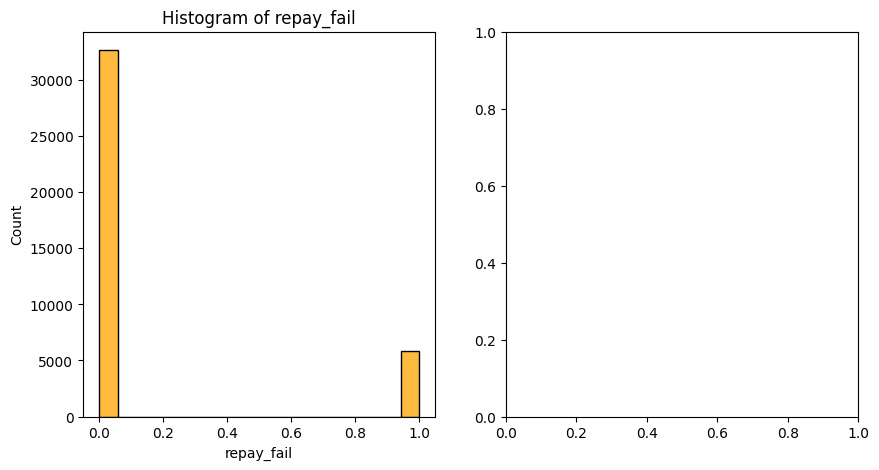

In [ ]:
#Repayment fail 1 Yes and 0 No
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(analysis_df, x="repay_fail", color='orange',kde=False, ax=axs[0])
axs[0].set_title('Histogram of repay_fail')
#sns.boxplot(analysis_df, x="repay_fail",color='orange', ax=axs[1])
#axs[1].set_title('Boxplot of repay_fail')
plt.show()

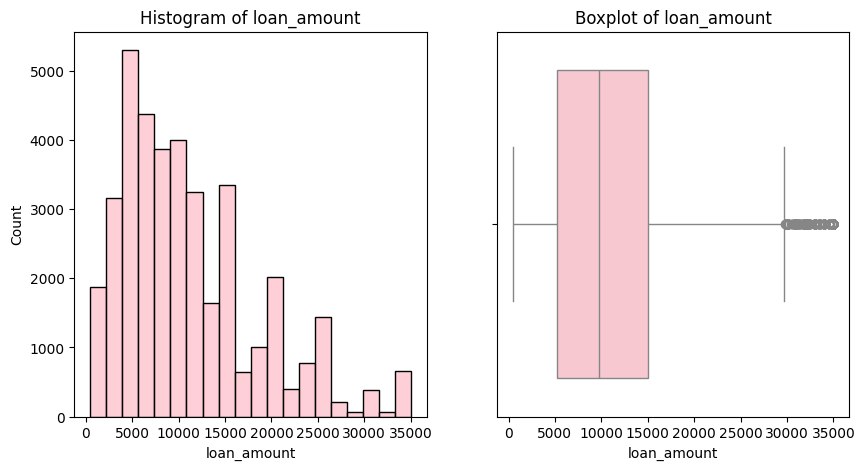

In [ ]:
#The loan amount taken by borrowers
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(analysis_df, x="loan_amount", bins=20, color='pink',kde=False, ax=axs[0])
axs[0].set_title('Histogram of loan_amount')
sns.boxplot(analysis_df, x="loan_amount",color='pink', ax=axs[1])
axs[1].set_title('Boxplot of loan_amount')
plt.show()

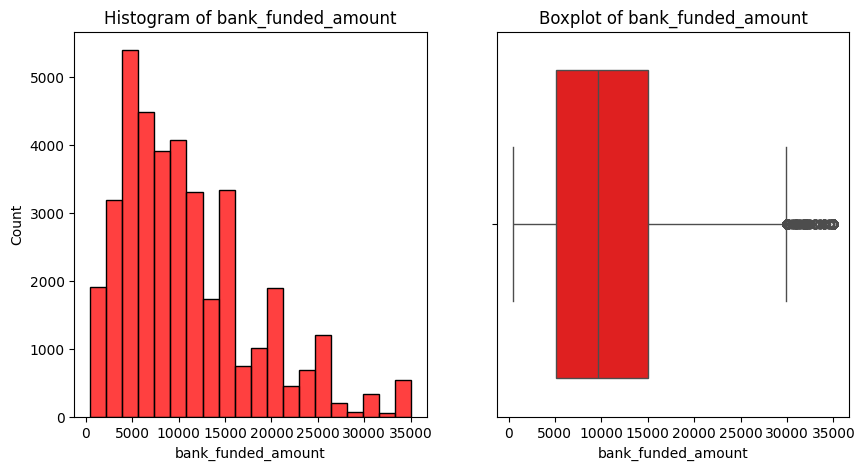

In [ ]:
#The bank funded loan amount
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(analysis_df, x="bank_funded_amount", bins=20, color='red',kde=False, ax=axs[0])
axs[0].set_title('Histogram of bank_funded_amount')
sns.boxplot(analysis_df, x="bank_funded_amount",color='red', ax=axs[1])
axs[1].set_title('Boxplot of bank_funded_amount')
plt.show()

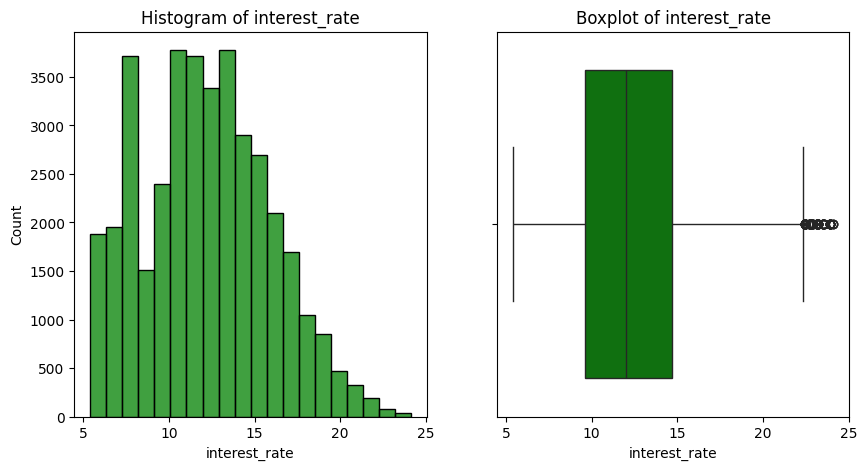

In [ ]:
#The interest rate
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(analysis_df, x="interest_rate", bins=20, color='green',kde=False, ax=axs[0])
axs[0].set_title('Histogram of interest_rate')
sns.boxplot(analysis_df, x="interest_rate",color='green', ax=axs[1])
axs[1].set_title('Boxplot of interest_rate')
plt.show()

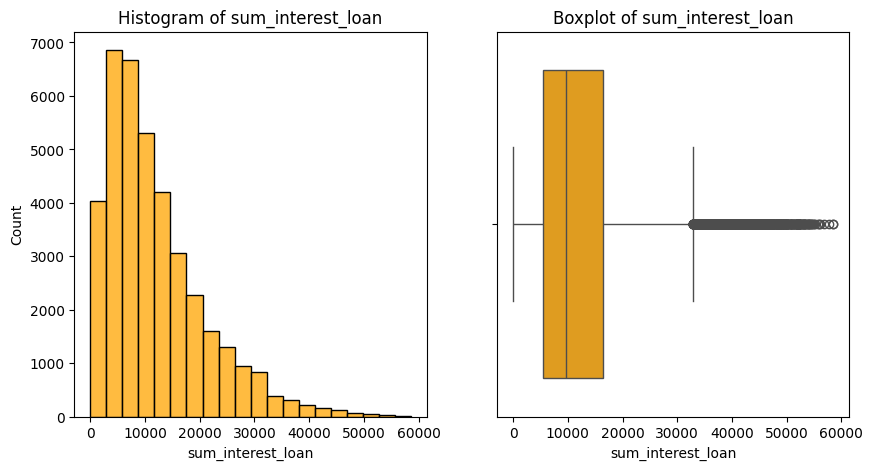

In [ ]:
#The interest on loan plus loan (shows banks potential profit)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(analysis_df, x="sum_interest_loan", bins=20, color='orange',kde=False, ax=axs[0])
axs[0].set_title('Histogram of sum_interest_loan')
sns.boxplot(analysis_df, x="sum_interest_loan",color='orange', ax=axs[1])
axs[1].set_title('Boxplot of sum_interest_loan')
plt.show()

In [ ]:
#Analysis for the categorical variables

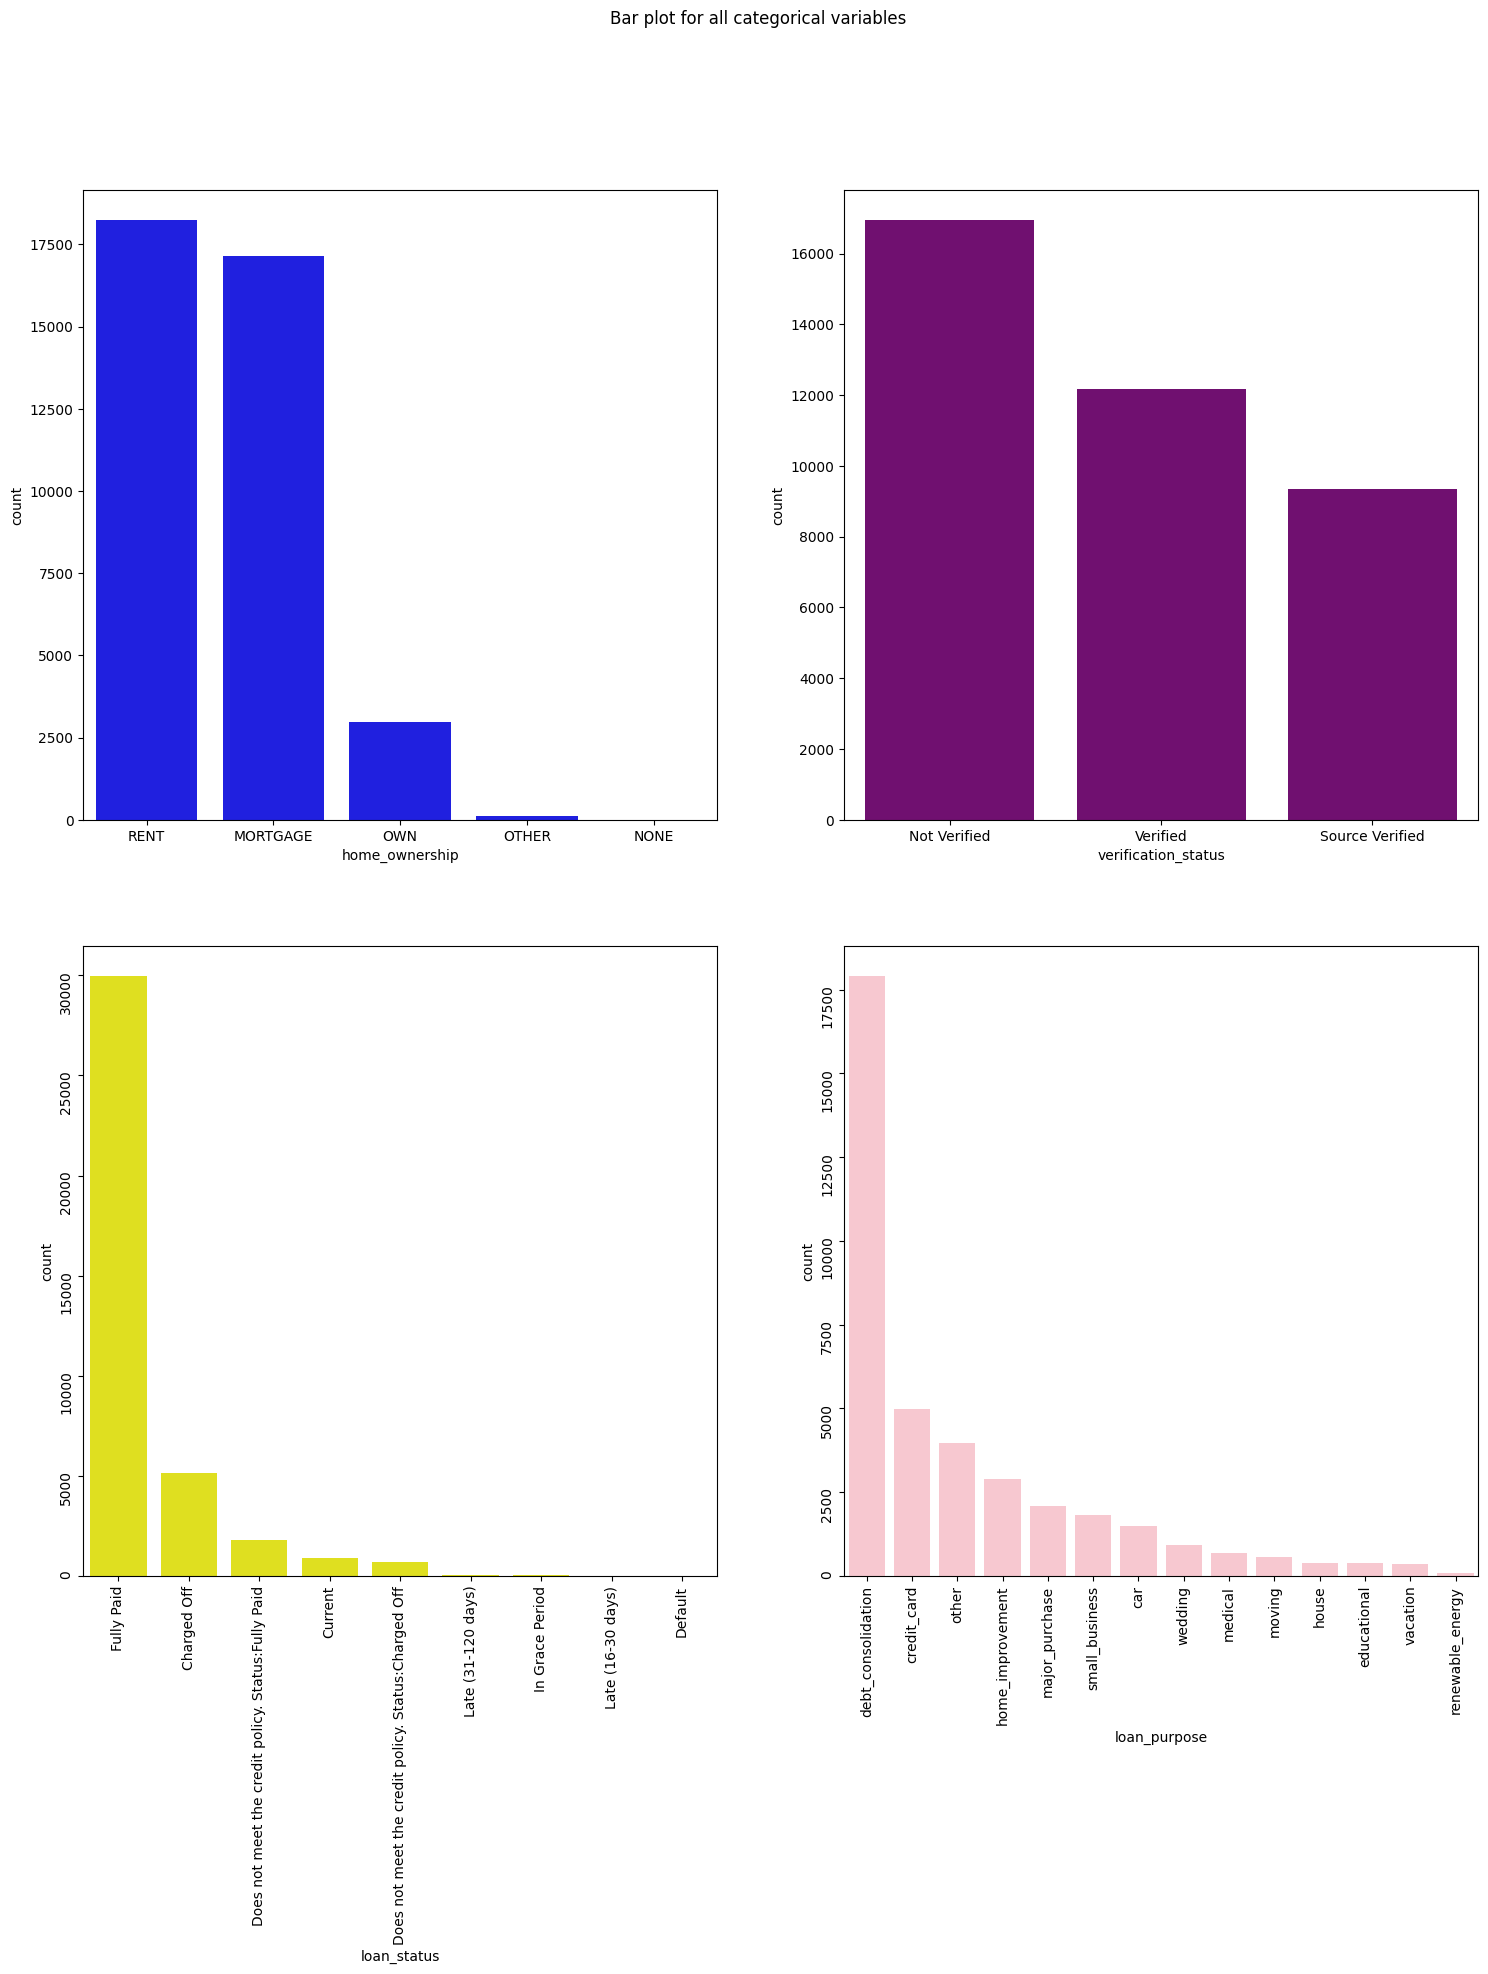

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables')
sns.countplot(ax = axes[0, 0], x = 'home_ownership', data = analysis_df, color = 'blue',
              order = analysis_df['home_ownership'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'verification_status', data = analysis_df, color = 'purple',
              order = analysis_df['verification_status'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'loan_status', data = analysis_df, color = 'yellow',
              order = analysis_df['loan_status'].value_counts().index);
axes[1][0].tick_params(labelrotation=90);
sns.countplot(ax = axes[1, 1], x = 'loan_purpose', data = analysis_df, color = 'pink',
              order = analysis_df['loan_purpose'].value_counts().index);
axes[1][1].tick_params(labelrotation=90);

In [ ]:
analysis_df.dtypes

,0
loan_amount,float64
bank_funded_amount,float64
term,int64
interest_rate,float64
installment,float64
employment_duration,int64
home_ownership,object
annual_income,float64
verification_status,object
loan_status,object


In [ ]:
#drop categorical variables with 3 or more values
df_default_nocat = analysis_df.drop(['home_ownership', 'verification_status', 'loan_status', 'loan_purpose'], axis=1)


In [ ]:
df_default_nocat.dtypes

,0
loan_amount,float64
bank_funded_amount,float64
term,int64
interest_rate,float64
installment,float64
employment_duration,int64
annual_income,float64
debt_to_income,float64
past_due_2years,float64
open_credit_lines,float64


<Axes: >

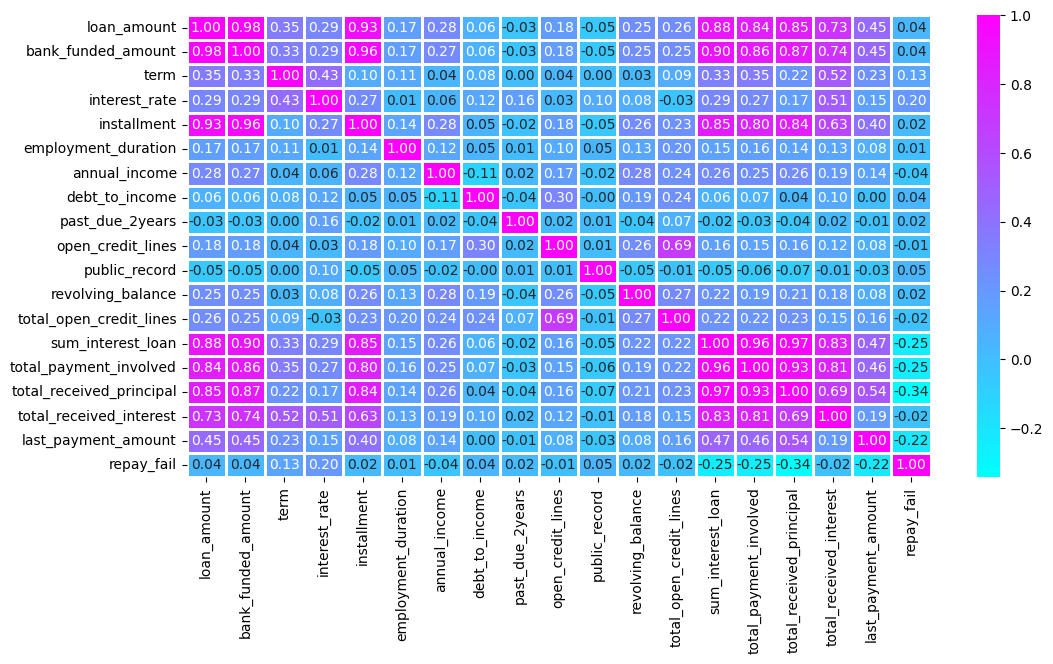

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df_default_nocat.corr(),cmap='cool',fmt='.2f',linewidths=2,annot=True)

In [ ]:
#Imputation of missing values etc.


In [ ]:
#null values are here
null_cols = analysis_df.columns[analysis_df.isnull().any()]
null_df = analysis_df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(analysis_df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_Default_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_Default_sorted)

                   Null Count  Null Percent
revolving_balance           3      0.007797
annual_income               1      0.002599


In [ ]:
#replaced missing revolving balance with mean value
df_default_nocat['revolving_balance'].fillna(df_default_nocat['revolving_balance'].mean(), inplace=True)


In [ ]:
#replaced the missing value of annual income with minimum value
df_default_nocat['annual_income'].fillna(df_default_nocat['annual_income'].mean(), inplace=True)


In [ ]:
df_default_nocat.isnull().sum()

,0
loan_amount,0
bank_funded_amount,0
term,0
interest_rate,0
installment,0
employment_duration,0
annual_income,0
debt_to_income,0
past_due_2years,0
open_credit_lines,0


In [ ]:
#handling outliers
#based on the boxplots sum_interest_loan, interest_rate, bank_fundd_loan and loan_amount needs to be checked.

In [ ]:
#Look at top values
print(df_default_nocat['sum_interest_loan'].value_counts().sort_index(ascending=False)[:10])

sum_interest_loan
58563.67993    1
58480.13992    1
57835.27991    1
56849.26986    1
56199.43995    1
              ..
61.71000       1
57.18000       1
44.96000       1
44.92000       2
35.71000       1
Name: count, Length: 36819, dtype: int64


In [ ]:
print(df_default_nocat['interest_rate'].value_counts().sort_index(ascending=False)[:10])

interest_rate
24.11      3
23.91     11
23.59      4
23.52      8
23.22      9
        ... 
10.20     18
10.14     10
10.08     52
10.01      7
10.00    225
Name: count, Length: 329, dtype: int64


In [ ]:
print(df_default_nocat['bank_funded_amount'].value_counts().sort_index(ascending=False)[:10])

bank_funded_amount
35000.0    505
34800.0      1
34675.0      2
34525.0      1
34475.0      4
          ... 
725.0        1
700.0        3
600.0        5
550.0        1
500.0       10
Name: count, Length: 1035, dtype: int64


In [ ]:
print(df_default_nocat['loan_amount'].value_counts().sort_index(ascending=False)[:10])

loan_amount
35000.0    618
34800.0      2
34675.0      1
34525.0      1
34475.0      5
          ... 
725.0        1
700.0        3
600.0        5
550.0        1
500.0       10
Name: count, Length: 880, dtype: int64


In [ ]:
#Save final file tobe used for modeling
df_default_nocat.to_csv('Default_model.csv', index=False)

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
#Read the new file
Default_model = pd.read_csv('/content/Default_model.csv')

In [ ]:
Default_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amount               38478 non-null  float64
 1   bank_funded_amount        38478 non-null  float64
 2   term                      38478 non-null  int64  
 3   interest_rate             38478 non-null  float64
 4   installment               38478 non-null  float64
 5   employment_duration       38478 non-null  int64  
 6   annual_income             38478 non-null  float64
 7   debt_to_income            38478 non-null  float64
 8   past_due_2years           38478 non-null  float64
 9   open_credit_lines         38478 non-null  float64
 10  public_record             38478 non-null  float64
 11  revolving_balance         38478 non-null  float64
 12  total_open_credit_lines   38478 non-null  float64
 13  sum_interest_loan         38478 non-null  float64
 14  total_

In [ ]:
Default_model.shape

(38478, 19)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#Reserve 10% of the data for model deployment testing
Default_model_10_percent, Default_model_remaining = train_test_split(Default_model, test_size=0.90, random_state=30)

In [ ]:
#to be used for final model evaluation
Default_model_10_percent.shape

(3847, 19)

In [ ]:
#to be used for training testing split
Default_model_remaining.shape

(34631, 19)

In [ ]:
#save the two files seperately
Default_model_10_percent.to_csv('Default_model_10_percent.csv', index=False)
Default_model_remaining.to_csv('Default_model_remaining.csv', index=False)

In [ ]:
#Train the model with the training data from the remaining dataset
x_status = Default_model_remaining.drop(['repay_fail'],axis=1)
y_status = Default_model_remaining['repay_fail']
x_status.shape,y_status.shape

#set the train/test split here (test 80/20, 70/30 and 50/50)
x_train, x_test, y_train, y_test = train_test_split(x_status, y_status, test_size=0.3,random_state=30, stratify = y_status)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24241, 18), (10390, 18), (24241,), (10390,))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, r2_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
RF = RandomForestClassifier() #create a new random forest classifier
GMB = GradientBoostingClassifier() #initiate the ensemble Classifier
XGBoost = xgb.XGBClassifier() #initiate the ensemble Classifier
Log_reg = LogisticRegression() #create a logistic regression model
SVC = LinearSVC()


In [ ]:
#define the Classifier function that will be used to train the models
def clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test):
        model_clf.fit(x_train, y_train) #fit the model
        y_train_pred = model_clf.predict(x_test) #make the prediction
        train_accuracy = model_clf.score(x_test,y_test)

        class_train_rep = classification_report(y_test,y_train_pred) #calculate he accuracy of the prediction made

        print(model_clf.__class__.__name__, "Train :","\n",class_train_rep)
        print("r2 score of", model_clf.__class__.__name__, "=",r2_score(y_test, y_train_pred),"\n")
        print("Cross Validation Score of", model_clf.__class__.__name__, "=",np.mean(cross_val_score(model_clf,x_train,y_train,cv=5)),"\n")
        print("Training Accuracy:",train_accuracy)

        confmatx = confusion_matrix(y_test,y_train_pred)
        #print("Confusion Matrix: \n", confmatx)
        cmhm = sns.heatmap(confmatx,annot=True,fmt='g')
        cmhm.set_xlabel("Predicted", labelpad=20)
        cmhm.set_ylabel("Actual", labelpad=20)


LogisticRegression Train : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8804
           1       0.99      0.96      0.98      1586

    accuracy                           0.99     10390
   macro avg       0.99      0.98      0.99     10390
weighted avg       0.99      0.99      0.99     10390

r2 score of LogisticRegression = 0.9419600628626332 

Cross Validation Score of LogisticRegression = 0.9947609302588333 

Training Accuracy: 0.992492781520693


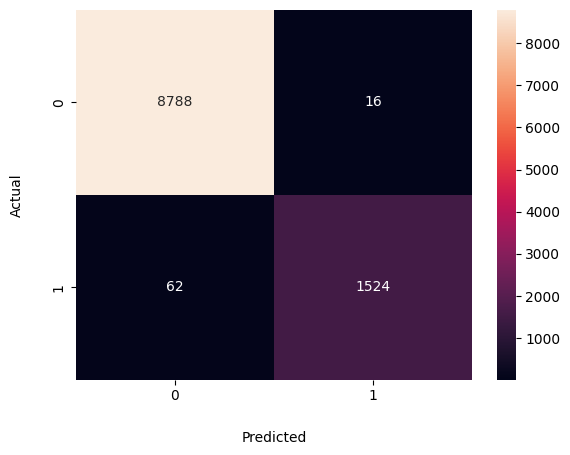

In [ ]:
#Logistic Regression model
model_clf = Log_reg
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

LinearSVC Train : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8804
           1       1.00      0.96      0.98      1586

    accuracy                           0.99     10390
   macro avg       1.00      0.98      0.99     10390
weighted avg       0.99      0.99      0.99     10390

r2 score of LinearSVC = 0.9494010804443469 

Cross Validation Score of LinearSVC = 0.9904293661991483 

Training Accuracy: 0.9934552454282964


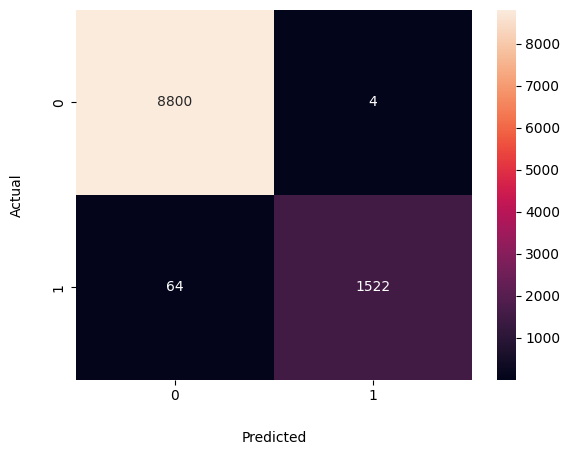

In [ ]:
#Support Vecto Machine (Linear SVC)
model_clf = SVC
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

RandomForestClassifier Train : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8804
           1       1.00      0.92      0.96      1586

    accuracy                           0.99     10390
   macro avg       0.99      0.96      0.98     10390
weighted avg       0.99      0.99      0.99     10390

r2 score of RandomForestClassifier = 0.9062431784704075 

Cross Validation Score of RandomForestClassifier = 0.9879955174317185 

Training Accuracy: 0.9878729547641963


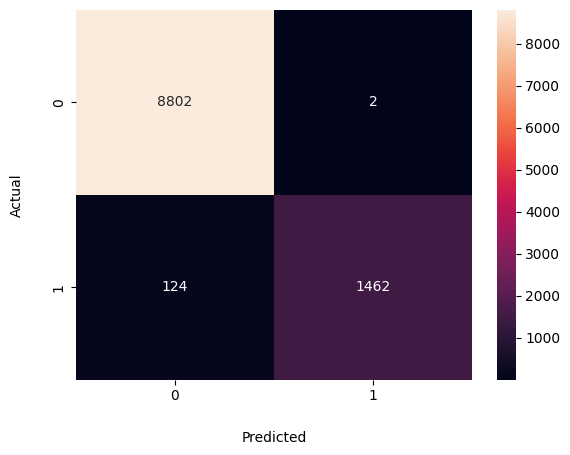

In [ ]:
#Random Forest
#RFC = RandomForestClassifier()
model_clf = RF
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

XGBClassifier Train : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8804
           1       1.00      0.96      0.98      1586

    accuracy                           0.99     10390
   macro avg       1.00      0.98      0.99     10390
weighted avg       0.99      0.99      0.99     10390

r2 score of XGBClassifier = 0.9494010804443469 

Cross Validation Score of XGBClassifier = 0.9934821119253604 

Training Accuracy: 0.9934552454282964


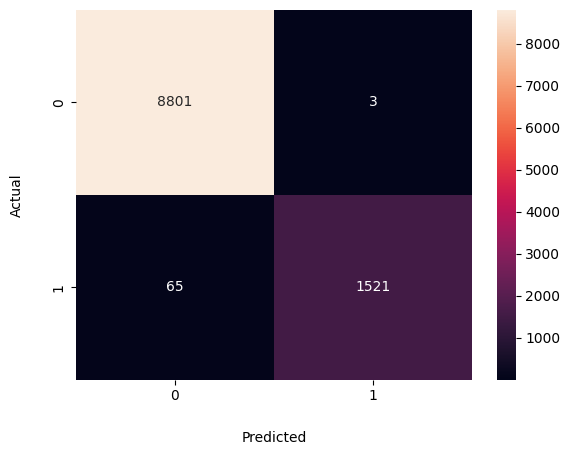

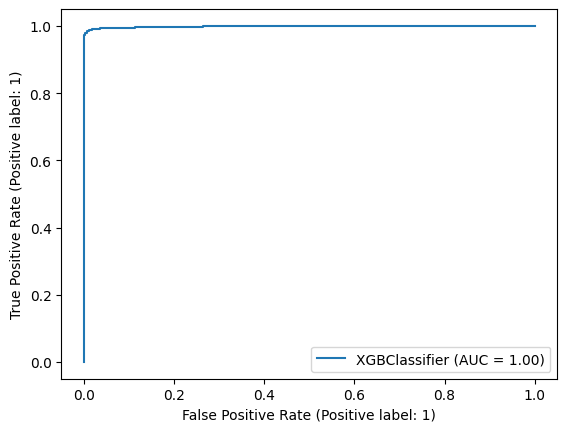

In [ ]:
#XGBoost
model_clf = XGBoost
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)
disp = RocCurveDisplay.from_estimator(model_clf, x_test, y_test)

In [ ]:
#MLP neural network
from sklearn.neural_network import MLPClassifier

In [ ]:
#Initiate the use of MLP classifier
#MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   # hidden_layer_sizes=(5, 2), random_state=1)

MLP = MLPClassifier()

MLPClassifier Train : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8804
           1       1.00      0.90      0.95      1586

    accuracy                           0.99     10390
   macro avg       0.99      0.95      0.97     10390
weighted avg       0.99      0.99      0.98     10390

r2 score of MLPClassifier = 0.8861524309997806 

Cross Validation Score of MLPClassifier = 0.9569778515797548 

Training Accuracy: 0.985274302213667


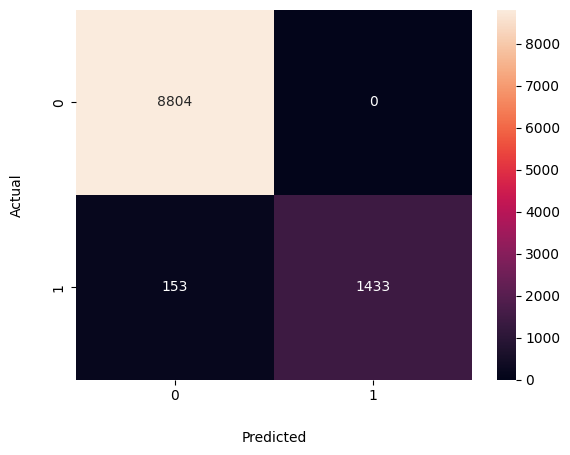

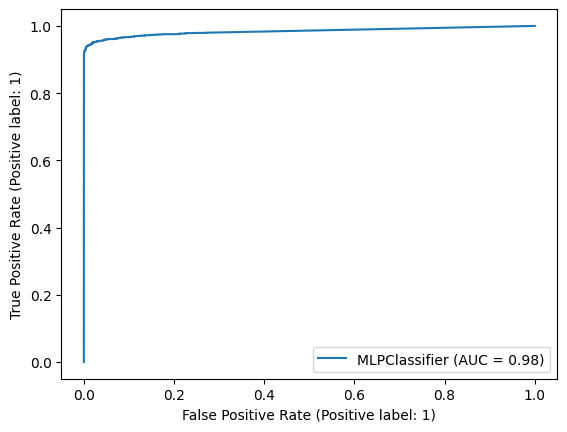

In [ ]:
model_clf = MLP
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)
disp = RocCurveDisplay.from_estimator(model_clf, x_test, y_test)

In [ ]:
#Ada Boost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
#ADA = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
ADA = AdaBoostClassifier()

AdaBoostClassifier Train : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8804
           1       0.99      0.87      0.93      1586

    accuracy                           0.98     10390
   macro avg       0.99      0.93      0.96     10390
weighted avg       0.98      0.98      0.98     10390

r2 score of AdaBoostClassifier = 0.8377858167186416 

Cross Validation Score of AdaBoostClassifier = 0.9775585810282411 

Training Accuracy: 0.9790182868142445


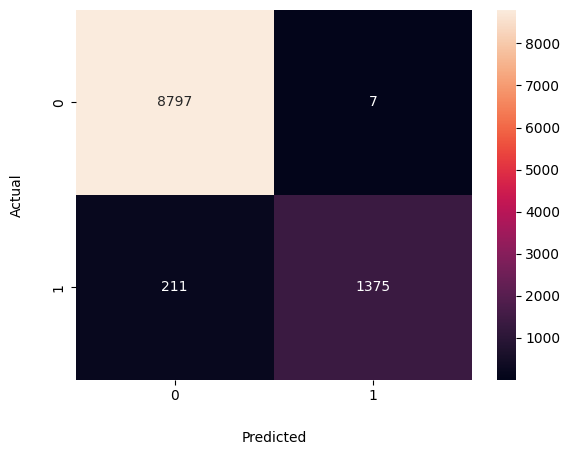

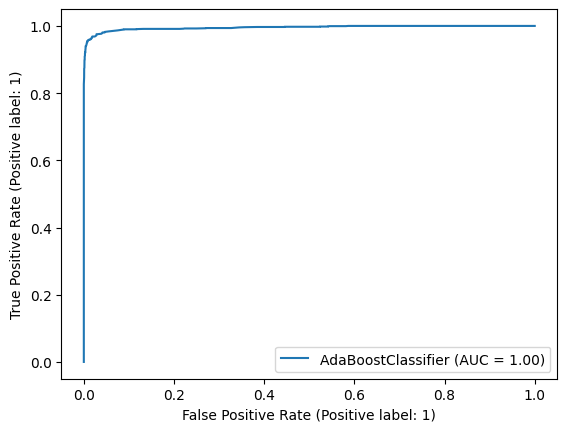

In [ ]:
model_clf = ADA
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)
disp = RocCurveDisplay.from_estimator(model_clf, x_test, y_test)

In [ ]:
#Categorical features only
categorical_features = ['employment_duration', 'term']

In [ ]:
#LightGBM
!pip install lightgbm

In [ ]:
#import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
LGBM = LGBMClassifier()
#LGBM = LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=1000)

[LightGBM] [Info] Number of positive: 3699, number of negative: 20542
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3159
[LightGBM] [Info] Number of data points in the train set: 24241, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152593 -> initscore=-1.714409
[LightGBM] [Info] Start training from score -1.714409
LGBMClassifier Train : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8804
           1       1.00      0.96      0.98      1586

    accuracy                           0.99     10390
   macro avg       1.00      0.98      0.99     10390
weighted avg       0.99      0.99      0.99     10390

r2 score of LGBMClassifier = 0.9531215892352037 

[LightGBM] [Info] Number of positive: 295

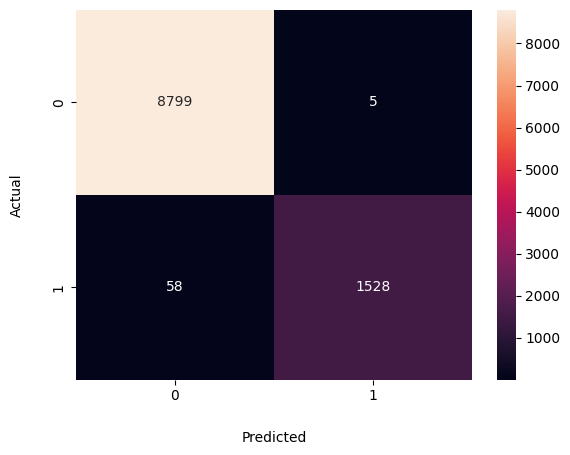

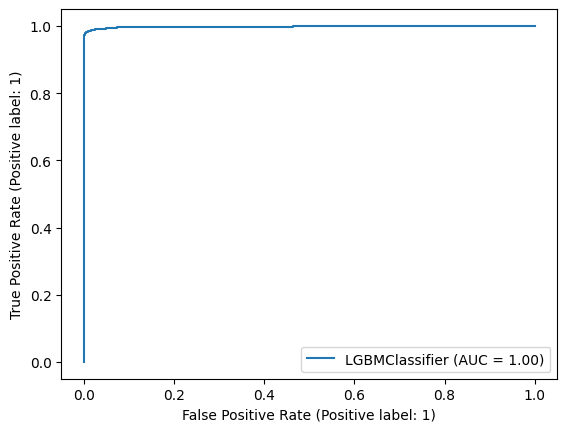

In [ ]:
model_clf = LGBM
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)
disp = RocCurveDisplay.from_estimator(model_clf, x_test, y_test)

In [ ]:
#Save the models
from google.colab import files
import pickle

In [ ]:
#download models
#Save using pickle
pickle.dump(XGBoost, open('/content/XGBoost_default.pkl', 'wb'))
pickle.dump(LGBM, open('/content/LGBM_default.pkl', 'wb'))
pickle.dump(MLP, open('/content/MLP_default.pkl', 'wb'))